In [46]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(12,5)

In [47]:
def plot_it(xs, ii, conv, dom=np.linspace(-1,1,1000), title='f(x) = '):
    plt.subplot(121)
    plt.plot(dom,f(dom), label='True')
    plt.plot(xs,f(xs),'-o', label='Approx')
    plt.title('Estimate')
    plt.legend()

    plt.subplot(122)
    plt.plot(np.linspace(0,ii-1,ii), np.abs(xs[1:]-xs[:-1]))
    plt.title(f'Convergence = {conv}')

    plt.tight_layout()
    plt.suptitle(title)
    plt.show()

### 12.10 - Newton's Method

In [48]:
def Newton(f, df, d2f, x0=1, eps=1e-10, M=100):
    """
    inputs:
        f - function (lambda)
        df - first derivative (lambda)
        d2f - second derivative (lambda)
        x0 - initial guess (float)
        eps - tolerance (float)
        M - max iterations (int)
        
    outputs:
        xs - min estimates (array)
        ii - number of steps (int)
        conv - converged? (bool)
    """
    # Set the conv flag to false, initialize the return list and loop through M iterations
    conv = False
    xs = [x0]
    for ii in range(M):

        # Calculate the next element using newton's method and append to the return list
        x1 = x0 - df(x0)/d2f(x0)
        xs.append(x1)

        # Check if the difference is less than the tolerance, if so break and set conv to true
        if np.abs(x1-x0) < eps: 
            conv = True
            break
        
        # Set the new x0 to the current xs
        x0 = x1
          
    # Return the results
    return np.array(xs), ii + 1, conv

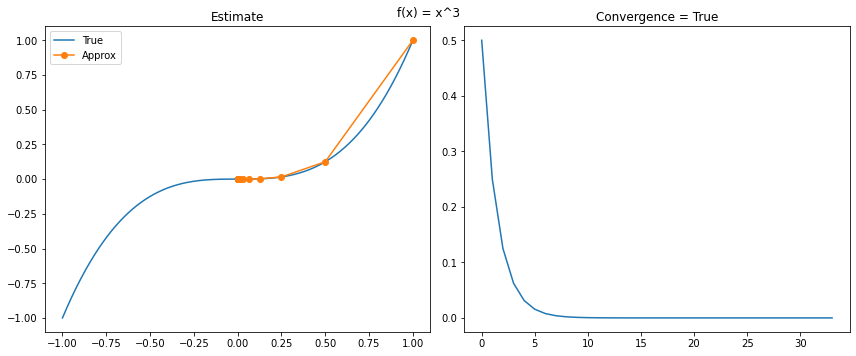

In [49]:
# f(x) = x^3

f = lambda x : x**3
df = lambda x : 3*x**2     # 1st derivative
d2f = lambda x : 6*x      # 2nd derivative

xs, ii, conv = Newton(f, df, d2f)
plot_it(xs, ii, conv, title='f(x) = x^3')

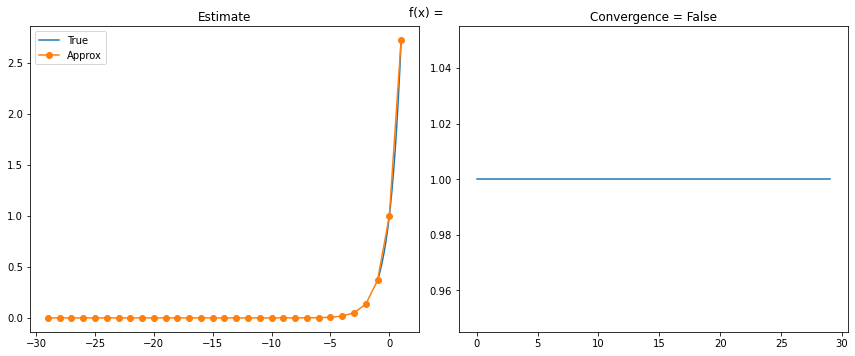

In [50]:
# f(x) = e^x, play with M

f = lambda x : np.exp(x)
df = lambda x : np.exp(x)
d2f = lambda x : np.exp(x)

xs, ii, conv = Newton(f, df, d2f, M = 30 )
plot_it(xs, ii, conv)

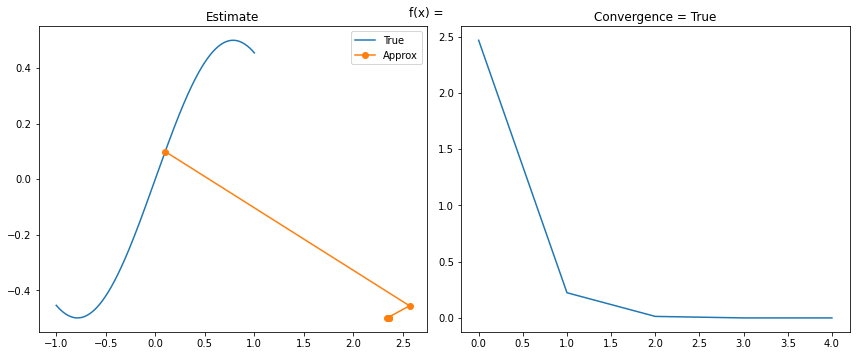

In [51]:
# f(x) = np.sin(x)*np.cos(x), x0=0.1

f = lambda x : np.sin(x)*np.cos(x)
df = lambda x : 1 - 2*np.sin(x)**2
d2f = lambda x : -4 * np.sin(x) * np.cos(x)

xs, ii, conv = Newton(f, df, d2f, x0=0.1)
plot_it(xs, ii, conv)

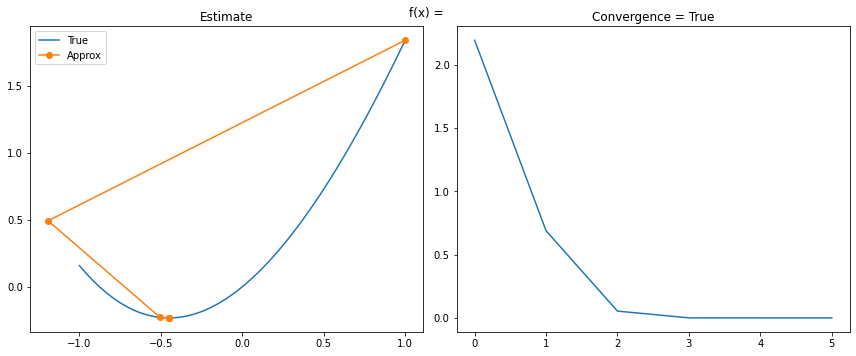

In [52]:
# f(x) = YOUR OWN EXAMPLE

f = lambda x : np.sin(x) + x**2
df = lambda x :  np.cos(x) + 2 * x
d2f = lambda x : 2 - np.sin(x)

xs, ii, conv = Newton(f, df, d2f)
plot_it(xs, ii, conv)

### 12.11 - Secant Method

#### Pt 1:

your text here or in your written work

#### Pt 2:

In [53]:
def Secant(x, b, eps=1e-10, M=100):
    """
    inputs:
        x - input - initial guess (float)
        b - base (float)
        
        eps - tolerance (float)
        M - max iterations (int)
        
    outputs:
        y - approximation (array)
    """
    # Make my initial guesses
    x0 = x    
    x1 = x0 / np.abs(b) * 1.0

    # Loop through it M times calculating the next element using secant method
    for i in range(M):
        x2 = x1 - (b**x1 - x ) * (x1 - x0) / (b**x1 - b**x0)

        # Check if the difference is less than the tolerance, if so break
        if np.abs(x2 - x1) < eps:
            break

        # Set the new x0 and x1 appropriately
        x0 = x1
        x1 = x2

    # Return the result
    y = x2
    return y

In [54]:
x = 3
b = 4

print(f'true:\t{np.log(x)/np.log(b)}')
print(f'approx:\t{Secant(x,b)}')

true:	0.7924812503605781
approx:	0.792481250360578


In [55]:
x = 48
b = 2

print(f'true:\t{np.log(x)/np.log(b)}')
print(f'approx:\t{Secant(x,b)}')

true:	5.584962500721157
approx:	5.584962500721156


In [56]:
# YOUR OWN EXAMPLE
x = 3
b = 10

print(f'true:\t{np.log(x)/np.log(b)}')
print(f'approx:\t{Secant(x,b)}')

true:	0.47712125471966244
approx:	0.4771212547196625
